# KENYA GRUMP CENTROID

In [1]:
import os

# set working directory
cwd = os.getcwd()
os.chdir('/Users/cascade/Github/NightTimeLightsAfrica/data/raw/grumpdata/Centroids/gpw-v4-admin-unit-center-points-population-estimates-rev10_ken_csv/')

print(cwd)

/Users/cascade/Github/NightTimeLightsAfrica/notebooks/jupyter


In [2]:
import csv
import pandas as pd
import numpy as np

kenya = pd.read_csv('gpw_v4_admin_unit_center_points_population_estimates_rev10_ken.csv')
kenya.head(6)

,GUBID,ISOALPHA,COUNTRYNM,NAME1,NAME2,NAME3,NAME4,NAME5,NAME6,CENTROID_X,...,A60_64M,A65PLUSM,A65_69M,A70PLUSM,A70_74M,A75PLUSM,A75_79M,A80PLUSM,A80_84M,A85PLUSM
0,{3E1BDDC7-9226-4429-B278-0CCD1EC8F844},KEN,Kenya,COAST,KWALE,KUBO,MAJIMBONI,MAJIMBONI,NaN,39.441224,...,16.116983,32.494117,10.901572,21.592545,9.947684,11.644861,4.930484,6.714377,0.0,0.0
1,{255E40B9-D3DF-498C-83E3-38E53DCF7384},KEN,Kenya,NAIROBI,NAIROBI WEST,KIBERA,KAREN,LENANA,NaN,36.723640,...,28.477296,34.044465,14.468304,19.576161,8.259683,11.316478,4.711900,6.604579,0.0,0.0
2,{4F6FFC05-4D2C-4359-9F76-797EFBA0FFBB},KEN,Kenya,COAST,MALINDI,MALINDI,GOSHI,MADUNGUNI,NaN,39.975428,...,17.184708,37.341302,11.582891,25.758410,9.605779,16.152631,6.571721,9.580910,0.0,0.0
3,{BCA9267B-53A6-4CF3-9A9D-7A4413C6E094},KEN,Kenya,NYANZA,SIAYA,UGUNJA,WEST UHOLO,SOUTH RAMBULA,NaN,34.322657,...,22.865009,56.227980,15.790108,40.437872,16.316733,24.121139,11.460563,12.660576,0.0,0.0
4,{A5298EAF-0FCE-4F1C-80DC-5CC97A613B80},KEN,Kenya,NORTH EASTERN,GARISSA,DANYERE,SIKLEY,MUDEY,NaN,38.916164,...,37.417938,64.980040,15.065000,49.915040,22.842061,27.072978,7.948255,19.124724,0.0,0.0
5,{E4839B08-2301-401F-B5E4-2C26E7EAB5EE},KEN,Kenya,NYANZA,NYANDO,LOWER NYAKACH,E. NYAKACH,JIMO EAST,NaN,35.007667,...,32.401646,65.345958,19.852509,45.493449,18.767178,26.726271,12.266499,14.459772,0.0,0.0


In [3]:
kenya_pop = pd.concat([kenya.NAME3, kenya.CENTROID_X, kenya.CENTROID_Y, kenya.UN_2000_E, 
                        kenya.UN_2005_E, kenya.UN_2010_E, kenya.UN_2015_E,
                        kenya.UN_2020_E], axis = 1)

In [4]:
pd.DataFrame.sum(kenya_pop)

NAME3         KUBOKIBERAMALINDIUGUNJADANYERELOWER NYAKACHMUK...
CENTROID_X                                               260840
CENTROID_Y                                             -2027.31
UN_2000_E                                              31065818
UN_2005_E                                              35349058
UN_2010_E                                              40328310
UN_2015_E                                              46050313
UN_2020_E                                              52186713
dtype: object

In [5]:
# Group by district
dist_2000_tot = ((kenya.groupby('NAME2')['UN_2000_E'].sum())) 
dist_2020_tot = ((kenya.groupby('NAME2')['UN_2020_E'].sum())) 

In [6]:
dist_0020_df = pd.concat([dist_2000_tot, dist_2020_tot], axis=1)
dist_0020_df.columns = ['dist_2000', 'dist_2020']
dist_0020_df['NAME4'] = dist_0020_df.index
dist_0020_df['totchng_0020'] = dist_0020_df.dist_2020 - dist_0020_df.dist_2000  # tot dif between 2000 and 2020
dist_0020_df['totpct_0020'] = dist_0020_df.totchng_0020 / dist_0020_df.dist_2000 *100 # pct change between 2000 and 2020
dist_0020_df['pctchng_dtotchng'] = (dist_0020_df.dist_2020 - dist_0020_df.dist_2000) / [52186713-31065818] * 100 #<-- contribution to total change

In [7]:
dist_0020_df

,dist_2000,dist_2020,NAME4,totchng_0020,totpct_0020,pctchng_dtotchng
NAME2,,,,,,
BARINGO,123635,227804,BARINGO,104169,84.255268,0.493204
BARINGO NORTH,71427,131595,BARINGO NORTH,60168,84.237053,0.284874
BOMET,302411,557192,BOMET,254781,84.249912,1.206298
BONDO,136654,188488,BONDO,51834,37.930833,0.245416
BORABU,63699,87861,BORABU,24162,37.931522,0.114399
BUNGOMA EAST,192593,288079,BUNGOMA EAST,95486,49.579164,0.452093
BUNGOMA NORTH,267913,400739,BUNGOMA NORTH,132826,49.578035,0.628884
BUNGOMA SOUTH,341770,511215,BUNGOMA SOUTH,169445,49.578664,0.802262
BUNGOMA WEST,203706,304697,BUNGOMA WEST,100991,49.576841,0.478157


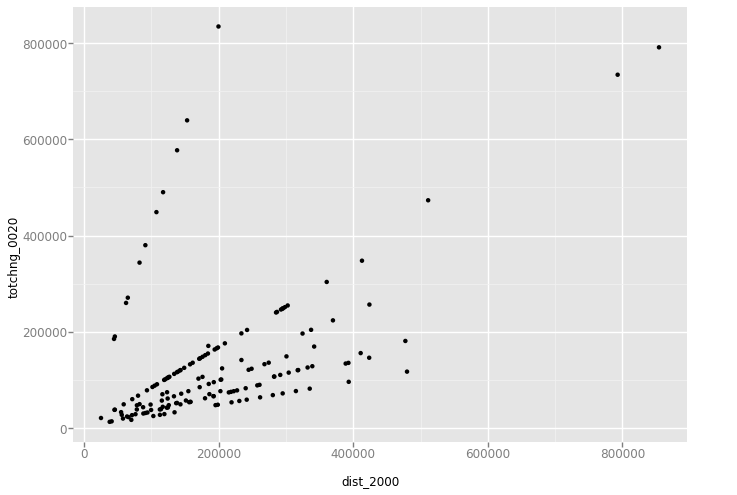

<ggplot: (283882451)>

In [9]:
from ggplot import *
ggplot(aes(x='dist_2000', y='totchng_0020'), data=dist_0020_df) +\
    geom_point()